## Example: apply K2 Systematic Correction to raw light curve

K2SC is intended to remove instrumental signals caused by the two-wheel pointing of the telescope.

__To run this notebook, first you have to install K2SC from its repository:__ https://github.com/OxES/k2sc

You can download a TPF from MAST.

In [1]:
from autoeap import createlightcurve

targetID = 'EPIC 248783511'
campaign = 14

And enable K2SC, then additional spline correction to K2SC corrected light curve to get rid of trends (if any).

To compare the raw and the corrected light curves, you can save the results to a file.

In [2]:
time,flux,flux_err = createlightcurve(
        targetID,              # Path to TPF or EPIC ID
        apply_K2SC=True,       # Apply K2 systematic correction
        remove_spline=True,    # Fit and remove low-order spline
        save_lc=True,          # Save final light curve to file
        campaign=campaign,     # K2 campaign number if TPF should be downladed
        TH=8,                  # Empirically determined tuning parameter
        show_plots=False,      # Vizualize steps inside notebook
        save_plots=False,      # Save plot files in a folder
        window_length=20       # The window length of the fitted spline in days.
        )

Local TPF not found, trying to download TPF instead
TPF found on MAST: K2 Campaign 14
Finding PSF centroids and removing outliers
Optimizing apertures for each cadence



Starting iteration
Iteration: 1
Iteration: 2
Iteration: 3
Iteration finished
Applying K2SC
Using default splits [3085, 3123.75] for campaign 14
Starting initial outlier detection
  Flagged 0 ( 0.0%) outliers.
Starting Lomb-Scargle period search
Overriding automatic kernel selection, using quasiperiodic kernel as given in the command line
Starting global hyperparameter optimisation using DE
  DE iteration   0 -ln(L) -1025.8
  DE iteration   1 -ln(L) -1025.8
  DE iteration   2 -ln(L) -1437.8
  DE iteration   3 -ln(L) -1437.8
  DE iteration   4 -ln(L) -1437.8
  DE iteration   5 -ln(L) -1507.7
  DE iteration   6 -ln(L) -1559.2
  DE iteration   7 -ln(L) -1607.7
  DE iteration   8 -ln(L) -1630.5
  DE iteration   9 -ln(L) -1669.7
  DE iteration  10 -ln(L) -1669.7
  DE iteration  11 -ln(L) -1669.7
  DE iteration  12 -ln(L) -1714.4
  DE iteration  13 -ln(L) -1714.4
  DE iteration  14 -ln(L) -1714.4
  DE iteration  15 -ln(L) -1714.4
  DE iteration  16 -ln(L) -1756.7
  DE iteration  17 -ln(L) -1

#### Visualize the corrected result

In [3]:
%matplotlib inline

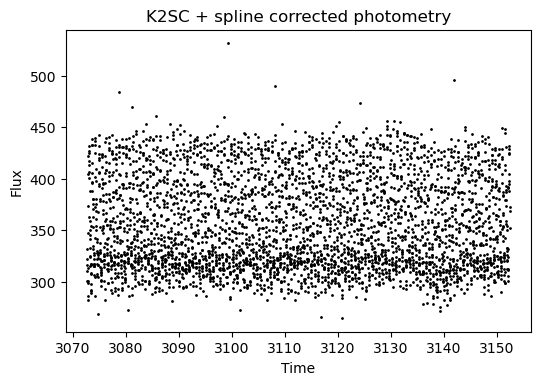

In [4]:
import matplotlib.pyplot as plt

plt.figure(dpi=100)
plt.title('K2SC + spline corrected photometry')
plt.scatter(time, flux, s=1, color='black')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()
plt.close()

#### Compare the raw and corrected results

Load saved data.

In [5]:
import pandas as pd

lc = pd.read_csv('EPIC_248783511_autoEAP_lc_TH8_k2sc_spline.lc')
lc

,time,flux,flux_err,corr_flux,splined_flux
0,3072.728674,315.97480,4.670032,318.840681,321.478545
1,3072.749106,335.18810,4.670747,328.831362,331.556254
2,3072.769539,313.86252,4.669506,313.212309,315.811925
3,3072.789971,311.61078,4.669043,307.568227,310.125065
4,3072.810404,300.55810,4.667648,297.794150,300.273662
...,...,...,...,...,...
3681,3152.310874,420.37793,5.011431,412.983798,397.425394
3682,3152.331306,410.32104,5.010759,403.279848,388.058084
3683,3152.372170,393.23850,5.011119,386.693303,372.042005
3684,3152.392601,390.26483,5.011299,382.881506,368.347064


As you can see, there are five columns. Let's compare the results.

The spline can be reproduced by dividing the K2SC corrected and spline corrected light curves.

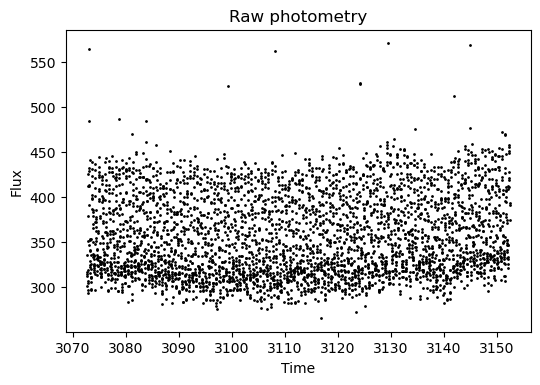

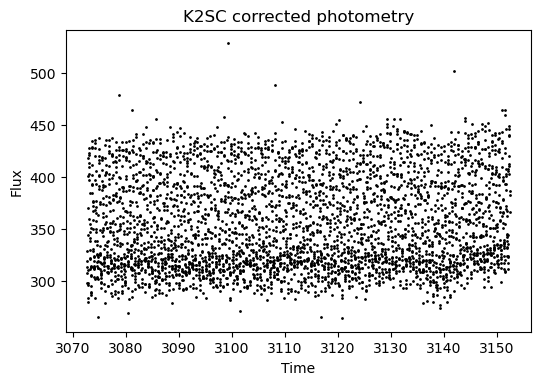

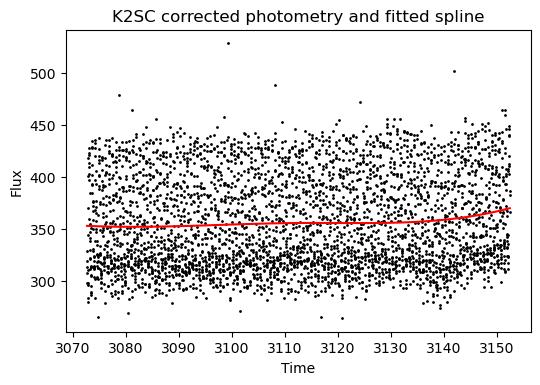

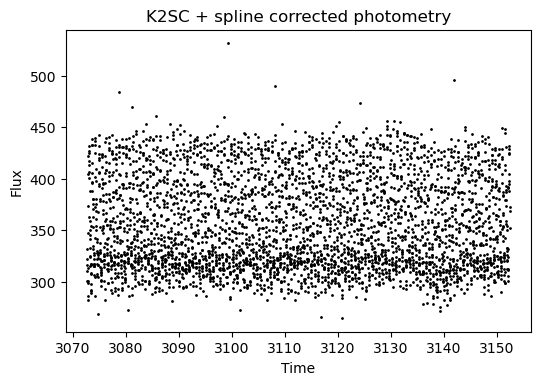

In [6]:
plt.figure(dpi=100)
plt.title('Raw photometry')
plt.scatter(lc.time, lc.flux, s=1, color='black')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()
plt.close()

plt.figure(dpi=100)
plt.title('K2SC corrected photometry')
plt.scatter(lc.time, lc.corr_flux, s=1, color='black')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()
plt.close()


spline = ( lc.corr_flux/lc.splined_flux ) * lc.corr_flux.mean()

plt.figure(dpi=100)
plt.title('K2SC corrected photometry and fitted spline')
plt.scatter(lc.time, lc.corr_flux, s=1, color='black')
plt.plot(lc.time, spline, c='r')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()
plt.close()

plt.figure(dpi=100)
plt.title('K2SC + spline corrected photometry')
plt.scatter(lc.time, lc.splined_flux, s=1, color='black')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()
plt.close()